In [ ]:
import pandas as pd


In [ ]:
#Upload file to drive
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#Load dataset
# import io
# data = pd.read_excel(io.BytesIO(uploaded['1day_3years.xlsx']))

In [ ]:
# read an excel file and convert into a dataframe object
data = pd.read_excel('1day_3years.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# show the dataframe
data

,time,open
0,2019-02-04,0.8000
1,2019-02-05,0.8600
2,2019-02-06,0.9000
3,2019-02-07,1.1200
4,2019-02-08,1.0500
...,...,...
1019,2023-02-17,0.2238
1020,2023-02-21,0.2237
1021,2023-02-22,0.2280
1022,2023-02-23,0.2290


In [ ]:
# Write the dataframe object into csv file
data.to_csv ("data.csv",  index = None, header=True)

In [ ]:
# read csv file and convert into a dataframe object
df = pd.DataFrame(pd.read_csv("data.csv"))

In [ ]:
# show the dataframe
df

,time,open
0,2019-02-04,0.8000
1,2019-02-05,0.8600
2,2019-02-06,0.9000
3,2019-02-07,1.1200
4,2019-02-08,1.0500
...,...,...
1019,2023-02-17,0.2238
1020,2023-02-21,0.2237
1021,2023-02-22,0.2280
1022,2023-02-23,0.2290


In [ ]:
# Change header from time to Date
df.rename(columns = {'time':'Date'}, inplace = True)

In [ ]:
# show the dataframe
df

,Date,open
0,2019-02-04,0.8000
1,2019-02-05,0.8600
2,2019-02-06,0.9000
3,2019-02-07,1.1200
4,2019-02-08,1.0500
...,...,...
1019,2023-02-17,0.2238
1020,2023-02-21,0.2237
1021,2023-02-22,0.2280
1022,2023-02-23,0.2290


In [ ]:
df['Date']

0       2019-02-04
1       2019-02-05
2       2019-02-06
3       2019-02-07
4       2019-02-08
           ...    
1019    2023-02-17
1020    2023-02-21
1021    2023-02-22
1022    2023-02-23
1023    2023-02-24
Name: Date, Length: 1024, dtype: object

In [ ]:
# Convert the date column to datetime format
# df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#df['Date']

In [ ]:
#function to convert string to datetime
import datetime

def str_to_datetime(s):
  split = s.split('-')

  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2019-02-04')
datetime_object

datetime.datetime(2019, 2, 4, 0, 0)

In [ ]:
#converting string to datetime
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2019-02-04
1      2019-02-05
2      2019-02-06
3      2019-02-07
4      2019-02-08
          ...    
1019   2023-02-17
1020   2023-02-21
1021   2023-02-22
1022   2023-02-23
1023   2023-02-24
Name: Date, Length: 1024, dtype: datetime64[ns]

In [ ]:
# Check for duplicate date entries
duplicate_dates = df[df.duplicated(subset=['Date'], keep=False)]

# Display the duplicate entries
print(duplicate_dates)

          Date    open
882 2022-08-04  0.3045
883 2022-08-05  0.3127
884 2022-08-04  0.3045
885 2022-08-05  0.3127


In [ ]:
# Remove duplicates based on a specific column
df = df.drop_duplicates(subset=['Date'])

# Save the DataFrame back to a new CSV file or the same one
# df.to_csv('new_file.csv', index=False)  # Use index=False to avoid saving the index as a column

In [ ]:
# Removing index and replace with date
df.index = df.pop('Date')


In [ ]:
# show the dataframe
df

,open
Date,
2019-02-04,0.8000
2019-02-05,0.8600
2019-02-06,0.9000
2019-02-07,1.1200
2019-02-08,1.0500
...,...
2023-02-17,0.2238
2023-02-21,0.2237
2023-02-22,0.2280


In [ ]:

df.head(15)

,open
Date,
2019-02-04,0.800
2019-02-05,0.860
2019-02-06,0.900
2019-02-07,1.120
2019-02-08,1.050
2019-02-11,0.945
2019-02-12,1.040
2019-02-13,0.960
2019-02-14,0.963


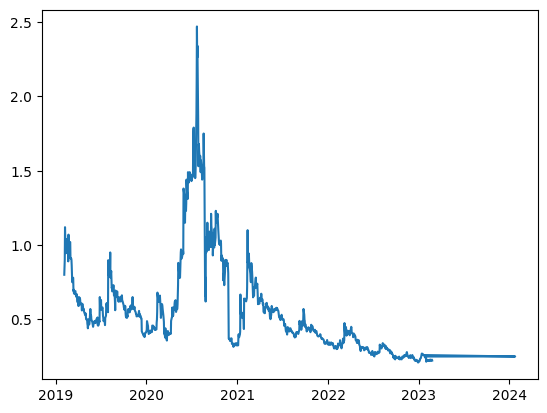

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['open'])

In [ ]:
import pandas as pd
import numpy as np
import datetime

# existing function to convert DataFrame to a windowed DataFrame
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    # target_date = first_date
    dates, X, Y = [], [], []


    while first_date <= last_date:
        target_date = first_date

        if target_date not in dataframe.index:
            #print(f"Warning: Date {target_date} not found in the DataFrame. Skipping.")
            first_date = target_date + datetime.timedelta(days=1)
            continue

        try:
          df_subset = dataframe.loc[:target_date].tail(n + 1)
        except KeyError:
            print(f"Error: Failed to slice data for date {target_date}.")
            return

        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['open'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        first_date = target_date + datetime.timedelta(days=1)

    ret_df = pd.DataFrame({'Target Date': dates})

    for i in range(1, n + 1):
        ret_df[f'Target-{i}'] = [X[j][i-1] for j in range(len(X))]

    ret_df['Target'] = Y

    return ret_df

# Start day second time around: '2019-02-07'
windowed_df = df_to_windowed_df(df, '2019-02-07', '2023-02-24', n=3)

# Define 'n' for reordering columns
n = 3

# Reorder the columns as needed
column_order = ['Target Date'] + [f'Target-{i}' for i in range(1, n + 1)] + ['Target']
windowed_df = windowed_df[column_order]


In [ ]:
windowed_df

,Target Date,Target-1,Target-2,Target-3,Target
0,2019-02-07,0.8000,0.8600,0.9000,1.1200
1,2019-02-08,0.8600,0.9000,1.1200,1.0500
2,2019-02-11,0.9000,1.1200,1.0500,0.9450
3,2019-02-12,1.1200,1.0500,0.9450,1.0400
4,2019-02-13,1.0500,0.9450,1.0400,0.9600
...,...,...,...,...,...
1013,2023-02-17,0.2215,0.2220,0.2300,0.2238
1014,2023-02-21,0.2220,0.2300,0.2238,0.2237
1015,2023-02-22,0.2300,0.2238,0.2237,0.2280
1016,2023-02-23,0.2238,0.2237,0.2280,0.2290


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1018,), (1018, 3, 1), (1018,))

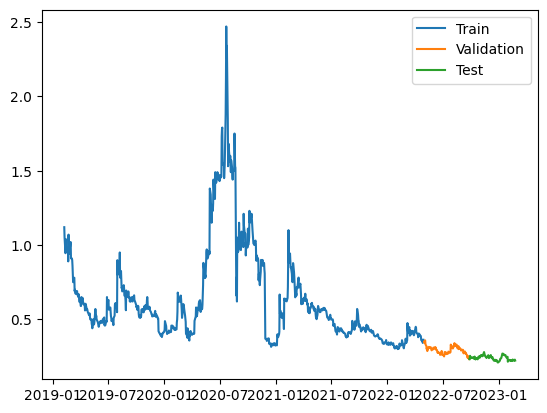

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
26/26 [==============================] - 4s 27ms/step - loss: 0.3220 - mean_absolute_error: 0.4757 - val_loss: 0.0015 - val_mean_absolute_error: 0.0341
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 0.0369 - mean_absolute_error: 0.1457 - val_loss: 0.0279 - val_mean_absolute_error: 0.1665
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 0.0184 - mean_absolute_error: 0.0961 - val_loss: 0.0211 - val_mean_absolute_error: 0.1447
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0727 - val_loss: 0.0063 - val_mean_absolute_error: 0.0779
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0542 - val_loss: 0.0024 - val_mean_absolute_error: 0.0473
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0465 - val_loss: 0.0021 - val_mean_absolute_error: 0.0443
Epoch 7/100
26/26 [==

26/26 [==============================] - 0s 2ms/step


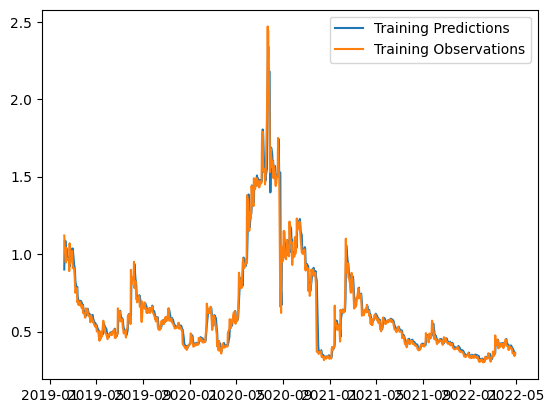

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
#orange orginal data and blue predicted data

4/4 [==============================] - 0s 4ms/step


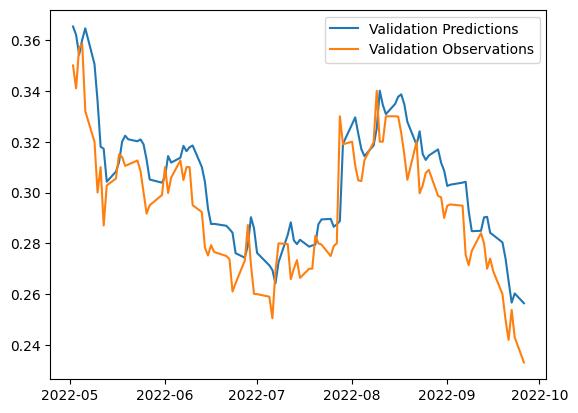

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 4ms/step


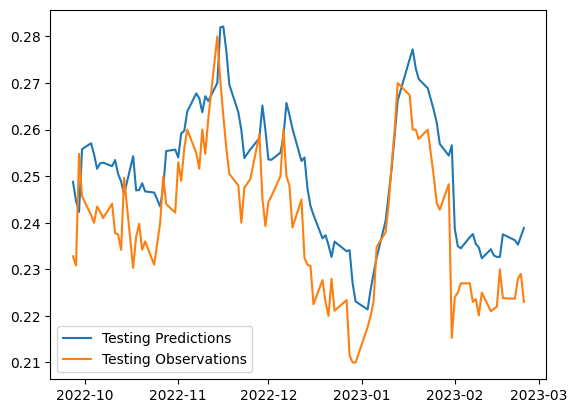

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

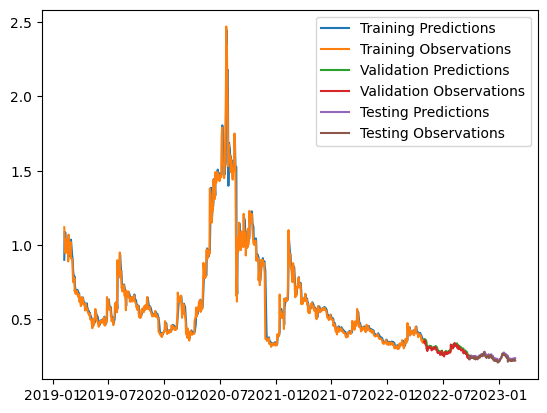

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
# Calculate the correlation between the 'Target' and 'Predicted' columns
from scipy.stats import pearsonr
#correlation, _ = pearsonr(val_predictions, y_val)
correlation1, _ = pearsonr(test_predictions, y_test)
#print(f'Correlation between actual and predicted values in testing: {correlation}')
print(f'Correlation between actual and predicted values in prediction: {correlation1}')


Correlation between actual and predicted values in prediction: 0.8647792134040391


In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 42ms/step


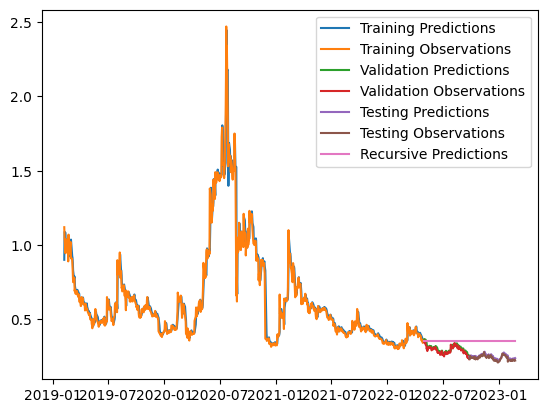

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])